# PROBLEMA DE TRANSPORTE COM TRANSBORDO

O Problema de Transbordo (_Transshipment Problem_) é uma extensão do Problema de Transporte, em que os produtos, além de poderem ir diretamente aos demandantes, podem também passar por pontos intermediários de transbordo (instalações como centros de distribuição, terminais, portos marítimos, fábricas, etc) que podem fornecer caminhos que reduzam o custo logístico. Em sua formulação mais geral, além das $m$ fábricas ofertantes, com cada uma tendo disponível $o_i$ produtos, e dos $n$ clientes demandantes, com cada um tendo um pedido de $d_j$ produtos a serem recebidos, temos também $t$ pontos de transporte, com cada um tendo uma capacidade de estocar $e_k$ produtos.

E o modelo abstrato de programação linear para este tipo de problema é dado como:

$$
\text{Min } z = \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij}x_{ij} + \sum_{i=1}^{m} \sum_{k=1}^{t} c_{ik}x_{ik} + \sum_{k=1}^{t} \sum_{j=1}^{n} c_{kj}x_{kj}\\
$$

$$
\begin{equation}
  \begin{array}{rlll}
    \text{Sujeito a: } & & \\
    & \sum_{j=1}^{n} x_{ij} + \sum_{k=1}^{t} x_{ik} \le o_{i}, & \forall \ i=1,...,m & (1) \\
    & \sum_{i=1}^{m} x_{ij} + \sum_{k=1}^{t} x_{kj} \ge d_{j}, & \forall \ j=1,...,n & (2) \\
    & \sum_{i=1}^{m} x_{ik}  \le e_{k}, & \forall \ k=1,...,t, & (3) \\
    & \sum_{i=1}^{m} x_{ik} = \sum_{j=1}^{n} x_{kj}, & \forall \ k=1,...,t & (4) \\
    & x \ge 0 & & (5)
  \end{array}
\end{equation}
$$

Onde:

- $x_{ij}$ são a quantidade de produtos enviadas do ofertante $i$ para o cliente $j$;
- $x_{ik}$ são a quantidade de produtos enviadas do ofertante $i$ para o ponto de transbordo $k$;
- $x_{kj}$ são a quantidade de produtos enviadas do ponto de transbordo $k$ para o cliente $j$;
- $c_{ij}$: o custo de transportar diretamente da fábrica $i$ até o cliente $j$;
- $c_{ik}$: o custo de transportar da fábrica $i$ até o ponto de transbordo $k$;
- $c_{kj}$: o custo de transportar do transbordo $k$ até o cliente $j$;
- $o_i$ são as ofertas das respectivas fábricas de origem $i$;
- $e_k$ são as capacidades de armazenazem de cada transbordo $k$;
- $d_j$ são as demandas de cada cliente $j$;
- O conjunto de restrições $(1)$ garante que a quantidade de produtos despachadas por cada ofertante não seja maior do que sua respectiva oferta;
- O conjunto $(2)$ garante que a quantidade de produtos que cada cliente receber deva atender a demanda de cada um deles;
- O conjunto $(3)$ garante que a quantidade de produtos que cada ponto de transbordo receber não exceda sua capcidade;
- O conjunto $(4)$ garante a continuidade do fluxo de mercadorias de cada um dos transbordo, isto é, a quantidade de mercadorias que entram em um transbordo deve ser igual a quantidade que sai dela;
- Por fim, a restrição $(5)$ garante a não negatividade das variáveis;

# Instância do Problema

> A companhia Portel Ltda atua no setor petroquímico e possui duas plantas. Uma delas é responsável pela produção de polímeros e está localizada em Recife. A outra está localizada em Manaus, sendo responsável pela produção de resina. A fim de reduzir os custos logísticos, os produtos sofrem uma etapa de transbordo em um dos centros de distribuição, os produtos são transportados para os clientes finais, localizados em Belo Horizonte, Joinville e Porto Alegre, conforme mostra a figura a seguir.

<center>

![exemplo_transbordo.png](https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Operations-Research-with-Python/assets/exemplo-transbordo.png)

</center>

> A capacidade de produção das fábricas é de 500 unidades em Manaus e 300 em Recife. A demanda dos consumidores de Belo Horizonte, Joinville e Porto Alegre é de 200, 250 e 350, respectivamente. A capacidade de armazenamento dos centros de distribuição são de 400. Os custos unitários de transporte das fábricas para os pontos de transbordo e dos pontos de transbordo para os consumidores finais estão representados nas tabelas a seguir. Formule o Problema de Transbordo.

* Custos unitários de transporte das fábricas para os centros de distribuição

<center>

|Fábrica|São Paulo|Rio de Janeiro|
|:------|:-------:|:------------:|
|Manaus |    8    |      10      |
|Recife |    7    |       6      |

</center>

* Custos unitários de transporte dos centros de distribuição para os consumidores

<center>

|Centro de Distribuição|Belo Horizonte|Joinville|Porto Alegre|
|:--------------------:|:-------:|:------------:|:----------:|
|São Paulo             |    2    |       3      |      4     |
|Rio de Janeiro        |  1      |       4      |      5     |

Fonte: [Aula 14 - Transporte com Transbordo](https://www.youtube.com/watch?v=oD_zwQBowzg)

</center>

A partir das informações dadas pelo enunciado, é possível instanciar o problema como sendo:

$$
\text{Min } z = 8x_{12} + 10x_{14} + 7x_{23} + 6x_{24} + 2x_{35} + 3x_{36} + 4x_{37} + x_{45} + 4x_{46} + 5x_{47}\\
$$

$$
\begin{equation}
  \begin{array}{rll}
    \text{Sujeito a: } & & \\
    & x_{13} + x_{14} \le 500 & \text{(Fábrica de Manaus)} \\
    & x_{23} + x_{24} \le 300 & \text{(Fábrica de Recife)} \\
    & x_{35} + x_{45} \ge 200 & \text{(Consumidor de Belo Horizonte)} \\
    & x_{36} + x_{46} \ge 250 & \text{(Consumidor de Joinville)} \\
    & x_{37} + x_{47} \ge 350 & \text{(Consumidor de Porto Alegre)} \\
    & x_{13} + x_{23} \le 400 & \text{(Centro de Distribuição de São Paulo)} \\
    & x_{14} + x_{24} \le 400 & \text{(Centro de Distribuição do Rio de Janeiro)} \\
    & x_{13} + x_{23} = x_{35} + x_{36} + x_{37} & \text{(Conservação de fluxo no CD de São Paulo)} \\
    & x_{14} + x_{24} = x_{45} + x_{46} + x_{47} & \text{(Conservação de fluxo no CD do Rio de Janeiro)} \\
    & x \ge 0 \\
    & x \in \mathbb{Z}
  \end{array}
\end{equation}
$$

# Modelando com Pyomo

Vamos imaginar que os custos de transporte das fábricas até os clientes estejam organizados em uma matriz e as ofertas de remessa de cada fábrica e demandas de cada centro de distribuição estejam armazenados em duas listas distintas, como mostrado a seguir:

In [ ]:
#           MN   RE
ofertas = [500, 300]

#           SP   RJ
estoques = [400, 400]

#            BH   JV   PA
demandas = [200, 250, 350]

# Custos de transporte das fábricas pros clientes:

#        BH JV PA
c_ij = [[ 0, 0, 0], # MN
        [ 0, 0, 0]] # RE

# Custos de transporte das fábricas pros centros de distribuição:
#        SP  RJ
c_ik = [[ 8, 10], # MN
        [ 7,  6]] # RE

# Custos de transporte dos centros de distribuição para :
#        BH JV PA
c_kj = [[ 2, 3, 4], # SP
        [ 1, 4, 5]] # RJ

# Encontrando o custo máximo em c_ij, c_ik e c_kj
max = -float('inf')
for i in range(len(c_ij)):
  for j in range(len(c_ij[0])):
    if c_ij[i][j] > max:
      max = c_ij[i][j]
for i in range(len(c_ik)):
  for k in range(len(c_ik[0])):
    if c_ik[i][k] > max:
      max = c_ik[i][k]
for k in range(len(c_kj)):
  for j in range(len(c_kj[0])):
    if c_kj[k][j] > max:
      max = c_kj[k][j]

# Substituindo os custos nulos pelo custo máximo encontrado vezes 100
for i in range(len(c_ij)):
  for j in range(len(c_ij[0])):
    if c_ij[i][j] == 0:
      c_ij[i][j] = 100*max
for i in range(len(c_ik)):
  for k in range(len(c_ik[0])):
    if c_ik[i][k] == 0:
      c_ik[i][k] = 100*max
for k in range(len(c_kj)):
  for j in range(len(c_kj[0])):
    if c_kj[k][j] == 0:
      c_kj[k][j] = 100*max

Para a resolução do problema instanciado com o Pyomo, é possível criar uma função que importe a biblioteca do Pyomo, e resolva o problema de transporte usando como parâmetros os dados fornecidos nos argumentos desta função, cujo código é mostrado como se segue:

In [ ]:
def problema_transbordo(ofertas, estoques, demandas, c_ij, c_ik, c_kj):

  import pyomo.environ as pyo # Importando o Pyomo

  modelo = pyo.ConcreteModel()           # Criando uma instância do modelo
  I = modelo.I = pyo.RangeSet(len(ofertas))  # Índice para as fábricas
  K = modelo.K = pyo.RangeSet(len(estoques)) # Índice para os centros de distribuição
  J = modelo.J = pyo.RangeSet(len(demandas)) # Índice para os clientes

  # VARIÁVEIS DE DECISÃO
  x_ij = modelo.x_ij = pyo.Var(I, J, within= pyo.NonNegativeIntegers)
  x_ik = modelo.x_ik = pyo.Var(I, K, within= pyo.NonNegativeIntegers)
  x_kj = modelo.x_kj = pyo.Var(K, J, within= pyo.NonNegativeIntegers)

  # PASSANDO OS PARÂMETROS DO PROBLEMA

  # Custos de transporte da fábrica i para o centro de dsitribuição j
  c_ij = modelo.c_ij = pyo.Param(I, J, initialize = lambda modelo, i, j: c_ij[i-1][j-1])
  c_ik = modelo.c_ik = pyo.Param(I, K, initialize = lambda modelo, i, k: c_ik[i-1][k-1])
  c_kj = modelo.c_kj = pyo.Param(K, J, initialize = lambda modelo, k, j: c_kj[k-1][j-1])

  # Oferta de cada fábrica
  o = modelo.o = pyo.Param (I, initialize = lambda modelo, i: ofertas[i-1])

  # Capacidade de armazenagem de cada centro de distribuição
  e = modelo.e = pyo.Param (K, initialize = lambda modelo, k: estoques[k-1])

  # Demanda de cada cliente
  d = modelo.d = pyo.Param (J, initialize = lambda modelo, j: demandas[j-1])

  # FUNÇÃO OBJETIVO
  obj = modelo.obj = pyo.Objective(
      rule= lambda modelo: sum(x_ij[i, j] * c_ij[i, j] for i in I for j in J) + \
                           sum(x_ik[i, k] * c_ik[i, k] for i in I for k in K) + \
                           sum(x_kj[k, j] * c_kj[k, j] for k in K for j in J),
      sense= pyo.minimize
  )

  # RESTRIÇÕES

  # R1: O total de remessas despachada por cada fábrica não pode ser maior que a sua oferta.
  modelo.R1 = pyo.Constraint(
      I,
      rule= lambda modelo, i: \
            sum(x_ij[i, j] for j in J) + \
            sum(x_ik[i, k] for k in K) <= o[i]
  )

  # R2: Cada cliente deve ter a sua demanda atendida.
  modelo.R2 = pyo.Constraint(
      J,
      rule= lambda modelo, j: \
            sum(x_ij[i, j] for i in I) + \
            sum(x_kj[k, j] for k in K) >= d[j]
  )

  # R3: O total de unidades recebidas nos centros de distribuição não deve exceder sua capacidade de estocagem
  modelo.R3 = pyo.Constraint(
      K,
      rule= lambda modelo, k: \
            sum(x_ik[i, k] for i in I) <= e[k]
  )

  # R4: total de unidades que entram em um CCD deve ser igual ao total que sai dele
  modelo.R4 = pyo.Constraint(
      K,
      rule= lambda modelo, k: \
            sum(x_ik[i, k] for i in I) == sum(x_kj[k, j] for j in J)
  )

  # RESOLUÇÃO DO MODELO
  gurobi = pyo.SolverFactory('gurobi') # Construindo o solver gurobi
  resultado = gurobi.solve(modelo) # Armazenando o resultado

  if str(resultado.Solver.status) == 'ok':

    # Imprimindo a função-objetiva
    registro = f"FUNÇÃO OBJETIVA\nz = {pyo.value(obj)}\n"

    # Imprimindo as varíaveis x_ij
    registro += f'\nVARIÁVEIS X_ij DE DECISÃO'
    chaves = list(x_ij.keys())
    for c in chaves:
      valor = pyo.value(x_ij[c])
      if valor != 0:
        registro += f"\nx{c[0]}{c[1]} = {valor:.2f}"

    # Imprimindo as varíaveis x_ik
    registro += f'\n\nVARIÁVEIS X_ik DE DECISÃO'
    chaves = list(x_ik.keys())
    for c in chaves:
      valor = pyo.value(x_ik[c])
      if valor != 0:
        registro += f"\nx{c[0]}{c[1]} = {valor:.2f}"

    # Imprimindo as varíaveis x_kj
    registro += f'\n\nVARIÁVEIS X_kj DE DECISÃO'
    chaves = list(x_kj.keys())
    for c in chaves:
      valor = pyo.value(x_kj[c])
      if valor != 0:
        registro += f"\nx{c[0]}{c[1]} = {valor:.2f}"

  else:

    registro = 'Nenhuma solução válida foi encontrada.'

  return registro

Cujo resultado encontrado será como dado a seguir:

In [ ]:
registro = problema_transbordo(ofertas, estoques, demandas, c_ij, c_ik, c_kj)
print(registro)

FUNÇÃO OBJETIVA
z = 8550.0

VARIÁVEIS X_ij DE DECISÃO

VARIÁVEIS X_ik DE DECISÃO
x11 = 400.00
x12 = 100.00
x22 = 300.00

VARIÁVEIS X_kj DE DECISÃO
x12 = 50.00
x13 = 350.00
x21 = 200.00
x22 = 200.00


# RESOLVENDO COM NETWORKX

Assim como foi feito para resolver o Problema do Caminho Mínimo na aula passada, serão utilizados as funções [`min_cost_flow()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html) e [`min_cost_flow_cost()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow_cost.html) para resolver o presente problema de Transbordo.

Da mesma forma como foi feito no Problema de Transporte, as ofertas das fábricas serão representados como demandas negativas enquanto as demandas dos clientes serão números positivos. Porém, para que seja inserida a capacidade de estoque de 400 unidades nos centros de distribuição, será necessário criar um par de nós para cada ponto de transbordo que houver no problema (Ex.: $RJ_1$ e $RJ_2$, ou $RJ$ e $RJ_{auxiliar}$, ou $RJ_{entrada}$ e $RJ_{saída}$, etc). Cada um dos pares de nós terão demanda 0 e serão conectados entre si por uma aresta com custo 0 e capacidade de 400 unidades.

In [ ]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
# Foi criado um atributo 'demanda' para cada nó para ser usado na função min_cost_flow()
# E foi criado um atributo 'partição' para ser usado na função multipartite_layout()
G.add_nodes_from([
    ("MN",     {'cidade': 'Manuas',         'partição': 1, 'demanda': -500}),
    ("RE",     {'cidade': 'Recife',         'partição': 1, 'demanda': -300}),
    ("$SP_1$", {'cidade': 'São Paulo',      'partição': 2, 'demanda':    0}), # Nó de entrada do transbordo SP
    ("$RJ_1$", {'cidade': 'Rio de Janeiro', 'partição': 2, 'demanda':    0}), # Nó de entrado do transbordo RJ
    ("$SP_2$", {'cidade': 'São Paulo',      'partição': 3, 'demanda':    0}), # Nó de saída do transbordo SP
    ("$RJ_2$", {'cidade': 'Rio de Janeiro', 'partição': 3, 'demanda':    0}), # Nó de saída do transbordo RJ
    ("BH",     {'cidade': 'Belo Horizonte', 'partição': 4, 'demanda':  200}),
    ("JV",     {'cidade': 'Joinville',      'partição': 4, 'demanda':  250}),
    ("PA",     {'cidade': 'Porto Alegre',   'partição': 4, 'demanda':  350})
    ])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'custo' para cada aresta
G.add_edges_from([
    ("MN",     "$SP_1$", {'custo':  8}),
    ("MN",     "$RJ_1$", {'custo': 10}),
    ("RE",     "$SP_1$", {'custo':  7}),
    ("RE",     "$RJ_1$", {'custo':  6}),
    ("$SP_1$", "$SP_2$", {'custo':  0, 'capacidade': 400}), # Aresta de transbordo SP
    ("$RJ_1$", "$RJ_2$", {'custo':  0, 'capacidade': 400}), # Aresta de transbordo RJ
    ("$SP_2$", "BH",     {'custo':  2}),
    ("$SP_2$", "JV",     {'custo':  3}),
    ("$SP_2$", "PA",     {'custo':  4}),
    ("$RJ_2$", "BH",     {'custo':  1}),
    ("$RJ_2$", "JV",     {'custo':  4}),
    ("$RJ_2$", "PA",     {'custo':  5})
])

# Calcula os fluxos em cada aresta
fluxos = nx.min_cost_flow(
    G,
    demand=    'demanda',
    capacity = 'capacidade',
    weight=    'custo'
)
print(f'Fluxos: {fluxos}')

# Calucla o valor do custo mínimo
custo_min = nx.min_cost_flow_cost(
    G,
    demand=   'demanda',
    capacity= 'capacidade',
    weight=   'custo'
)
print(f'Custo Mínimo: {custo_min}')

Fluxos: {'MN': {'$SP_1$': 400, '$RJ_1$': 100}, 'RE': {'$SP_1$': 0, '$RJ_1$': 300}, '$SP_1$': {'$SP_2$': 400}, '$RJ_1$': {'$RJ_2$': 400}, '$SP_2$': {'BH': 0, 'JV': 50, 'PA': 350}, '$RJ_2$': {'BH': 200, 'JV': 200, 'PA': 0}, 'BH': {}, 'JV': {}, 'PA': {}}
Custo Mínimo: 8550


## Desenhando o Grafo

Desta vez foi utilizado a função [`multipartite_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.multipartite_layout.html#networkx.drawing.layout.multipartite_layout) com o intuito de desenhar um grafo multipartido, posicionando os nós em várias camadas ou em linhas retilíneas.

Como feito na aula passada, após desenhar o grafo com a função [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx), é necessário escrever o código para criar os rótulos das arestas, o que é feito usando a função [`draw_networkx_edge_labels()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


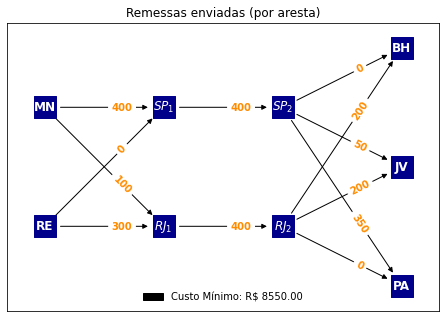

In [ ]:
import matplotlib.pyplot as plt

# Definindo a disposição dos nós do grafo G
posicao = nx.multipartite_layout(
    G,                      # Grafo G
    subset_key= 'partição', # Define qual o atributo que será usado para criar as camadas
    align= 'vertical'       # Define o alinhamento das camadas como vertical
)

# Desenha o grafo G
nx.draw_networkx(
    G,                       # Grafo original # Título do Grafo
    ax= plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós
    node_color= 'darkblue',  # Define a cor dos nós como azul escuro
    node_size= 500,          # Define o tamanho dos nós
    node_shape= 's',         # Define o formato dos nós como quadrado
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
)

# Criando os rótulos para as arestas do grafo G
rotulos_arestas = nx.draw_networkx_edge_labels(
    G,
    pos= posicao,
    ax= plt.axes([0,0,1,1]),
    edge_labels= {
        (no1, no2): fluxos[no1][no2] for no1 in fluxos for no2 in fluxos[no1]
        }, # List Comprehension para criar um dicionário dos rótulos
    label_pos= 0.35,
    font_color= 'darkorange',
    font_weight= 'bold',
    rotate= True,
    horizontalalignment= 'center',
    verticalalignment= 'center'
)
plt.title('Remessas enviadas (por aresta)')
legenda = plt.legend(
    labels= [f'Custo Mínimo: R$ {custo_min:.2f}'],
    loc= 'lower center',
    framealpha= 0
)

# Exercício

> Uma companhia distribuidora de bebidas dispõe de dois centros de produção - Araraquara(1) e S. J. dos Campos (2) - e 3 depósitos - Campinas (3) e Barra Mansa (4) - para abastecer os mercados consumidores em São Paulo (5), Belo Horizonte (6) e Rio de Janeiro (7). Os mercados consumidores são abastecidos somente a partir deste depósitos. Os custos unitários de se transportar uma unidade do produto de cada centro de produção para cada depósito e de cada depósito para cada mercado consumidor são dados nas duas tabelas a seguir, respectivamente.

<center>

<table align=left, style='width:50%'>
  <caption>
    <b>Custos unitários de transporte de centros de produção aos depósitos</b>
  </caption>
  <tr align=center>
    <th rowspan=2>Centro de Suprimentos</th>
    <th colspan=2>Depósitos</th>
    <th rowspan=2>Capacidade</th>
  </tr>
  <tr align=center>
    <th>Campinas (3)</th>
    <th>Barra Mansa (4)</th>
  </tr>
  <tr align=center>
    <td>Araraquara (1)</td>
    <td>1</td>
    <td>3</td>
    <td>800</td>
  </tr>
  <tr align=center>
    <td>S. J. Campos (2)</td>
    <td>1</td>
    <td>2</td>
    <td>1000</td>
  </tr>
</table>

<br>

<table align=right, style='width:50%'>
  <caption>
    <b>Custos unitários dos depósitos aos mercados consumidores</b>
  </caption>
  <tr align=center>
    <th rowspan=2>Depósitos</th>
    <th colspan=3>Mercados consumidores</th>
  </tr>
  <tr align=center>
    <th>São Paulo (5)</th>
    <th>Belo Horizonte (6)</th>
    <th>Rio de Janeiro (7)</th>
  </tr>
  <tr align=center>
    <td>Campinas (3)</td>
    <td>1</td>
    <td>3</td>
    <td>3</td>
  </tr>
  <tr align=center>
    <td>Barra Mansa (4)</td>
    <td>3</td>
    <td>4</td>
    <td>1</td>
  </tr>
  <tr align=center>
    <td>Demanda</td>
    <td>500</td>
    <td>400</td>
    <td>900</td>
  </tr>
</table>

Fonte: ARENALES, Marcos; ARMENTANO, Vinícius; MORANITO, Reinaldo e YANASSE, Horacio. <b>Pesquisa Operacional para Cursos de Engenharia</b>. 2ª edição. Exemplo 2.5, pág. 24.

</center>

(a) Resolva pelo Pyomo

In [ ]:
import pyomo.environ as pyomo



(b) Resolva pelo NetworkX

In [ ]:
import networkx as nx



(c) Plote os grafo, tanto o original quanto a solução com os fluxos dos arcos, com o Matplotlib

In [ ]:
import matplotlib.pyplot as plt

